**[Week 1 - Python](https://radu-enuca.gitbook.io/ml-challenge/python)**

---


# Setup

To get started, **run the setup code below** before writing your own code (and if you leave this notebook and come back later, don't forget to run the setup code again).

In [ ]:
# if you're using Google Colab run this cell to install extra libraries
!pip install git+https://github.com/ML-Challenge/learntools.git

In [1]:
from learntools.core import binder; binder.bind(globals())
from learntools.python.ex7 import *
print('Setup complete.')

Setup complete.


# Exercises

## 1.

After completing the exercises on lists and tuples, Jimmy noticed that, according to his `estimate_average_slot_payout` function, the slot machines at the Learn Python Casino are actually rigged *against* the house, and are profitable to play in the long run.

Starting with $200 in his pocket, Jimmy has played the slots 500 times, recording his new balance in a list after each spin. He used Python's `matplotlib` library to make a graph of his balance over time:

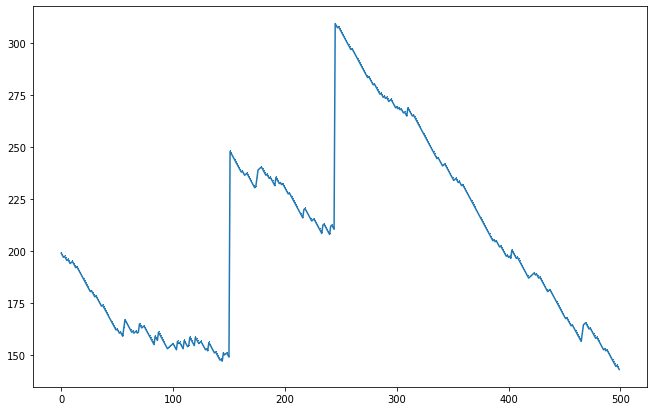

In [3]:
# Import the jimmy_slots submodule
from learntools.python import jimmy_slots
# Call the get_graph() function to get Jimmy's graph
graph = jimmy_slots.get_graph()
graph

As you can see, he's hit a bit of bad luck recently. He wants to tweet this along with some choice emojis, but, as it looks right now, his followers will probably find it confusing. He's asked if you can help him make the following changes:

1. Add the title "Results of 500 slot machine pulls"
2. Make the y-axis start at 0. 
3. Add the label "Balance" to the y-axis

After calling `type(graph)` you see that Jimmy's graph is of type `matplotlib.axes._subplots.AxesSubplot`. Hm, that's a new one. By calling `dir(graph)`, you find three methods that seem like they'll be useful: `.set_title()`, `.set_ylim()`, and `.set_ylabel()`. 

Use these methods to complete the function `prettify_graph` according to Jimmy's requests. We've already checked off the first request for you (setting a title).

(Remember: if you don't know what these methods do, use the `help()` function!)

**Bonus:** Can you format the numbers on the y-axis so they look like dollar amounts? e.g. $200 instead of just 200.

(We're not going to tell you what method(s) to use here. You'll need to go digging yourself with `dir(graph)` and/or `help(graph)`.)

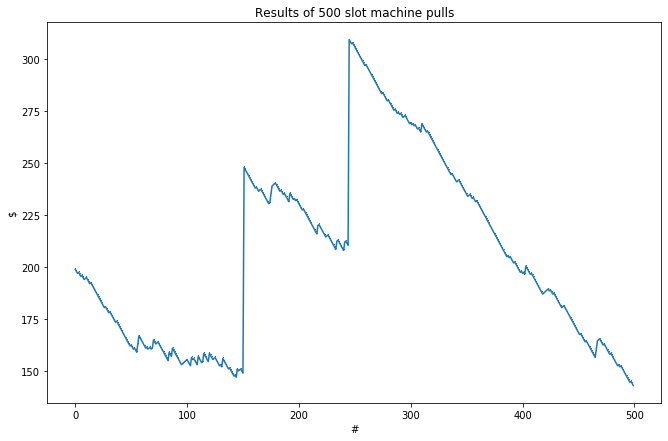

In [6]:
def prettify_graph(graph):
    """Modify the given graph according to Jimmy's requests: add a title, make the y-axis
    start at 0, label the y-axis. (And, if you're feeling ambitious, format the tick marks
    as dollar amounts using the "$" symbol.)
    """
    graph.set_title("Results of 500 slot machine pulls")
    graph.set_ylabel("$")
    graph.set_xlabel("#")
    
    # Complete steps 2 and 3 here

graph = jimmy_slots.get_graph()
prettify_graph(graph)
graph

In [ ]:
# Check your answer (Run this code cell to receive credit!)
q1.solution()

## 2. (Optional)

Luigi is trying to perform an analysis to determine the best items for winning races on the Mario Kart circuit. He has some data in the form of lists of dictionaries that look like...

    [
        {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
        {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
        # Sometimes the racer's name wasn't recorded
        {'name': None, 'items': ['mushroom',], 'finish': 2},
        {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
    ]

`'items'` is a list of all the power-up items the racer picked up in that race, and `'finish'` was their placement in the race (1 for first place, 3 for third, etc.).

He wrote the function below to take a list like this and return a dictionary mapping each item to how many times it was picked up by first-place finishers.

In [ ]:
def best_items(racers):
    """Given a list of racer dictionaries, return a dictionary mapping items to the number
    of times those items were picked up by racers who finished in first place.
    """
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

He tried it on a small example list above and it seemed to work correctly:

In [ ]:
sample = [
    {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
    {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
    {'name': None, 'items': ['mushroom',], 'finish': 2},
    {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
]
best_items(sample)

However, when he tried running it on his full dataset, the program crashed with a `TypeError`.

Can you guess why? Try running the code cell below to see the error message Luigi is getting. Once you've identified the bug, fix it in the cell below (so that it runs without any errors).

In [11]:
# Import luigi's full dataset of race data
from learntools.python.luigi_analysis import full_dataset

# Fix me!
def best_items(racers):
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for rac in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if rac not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

# Try analyzing the imported full dataset
best_items(full_dataset)

{1: 1, 2: 1, 4: 1, 5: 1, 7: 1}

In [ ]:
#q2.hint()

In [12]:
# Check your answer (Run this code cell to receive credit!)
q2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Luigi used the variable name `i` to represent each item in racer['items'].
However, he also used `i` as the loop variable for the outer loop (`for i in range(len(racers))`).
These i's are clobbering each other. This becomes a problem only if we encounter a racer
with a finish of 1 and a name of `None`. If that happens, when we try to print the "WARNING" message,
`i` refers to a string like "green shell", which python can't add to an integer, hence a `TypeError`.

This is similar to the issue we saw when we imported * from `math` and `numpy`. They both contained variables called `log`, and the one we got when we tried to call it was the wrong one.

We can fix this by using different loop variables for the inner and outer loops. `i` wasn't a very
good variable name for the inner loop anyways. `for item in racer['items']` fixes the bug and is 
easier to read.

Variable shadowing bugs like this don't come up super often, but when they do they can take an infuriating amount of time to diagnose!


## 3.
Suppose we wanted to create a new type to represent hands in blackjack. One thing we might want to do with this type is overload the comparison operators like `>` and `<=` so that we could use them to check whether one hand beats another. e.g. it'd be cool if we could do this:

```python
>>> hand1 = BlackjackHand(['K', 'A'])
>>> hand2 = BlackjackHand(['7', '10', 'A'])
>>> hand1 > hand2
True
```

Well, we're not going to do all that in this question (defining custom classes is a bit beyond the scope of these lessons), but the code we're asking you to write in the function below is very similar to what we'd have to write if we were defining our own `BlackjackHand` class. (We'd put it in the `__gt__` magic method to define our custom behaviour for `>`.)

Fill in the body of the `blackjack_hand_greater_than` function according to the docstring.

In [32]:
class BlackjackHand(object):
    cardsValue = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10 , 'J': 10, 'Q': 10, 'K': 10 , 'A': 11}
    
    def __init__(self, cards):
        self.cards = cards
    
    def countCards(self):
        total = 0
        for card in self.cards:
            total += BlackjackHand.cardsValue[card]
        for card in self.cards:
            if total > 21 and card == 'A':
                total-=10
        if total > 21:
            return -1
        return total
  
    def __gt__(self, other):
        return self.countCards() > other.countCards()
    def __lt__(self, other):
        return self.countCards() < other.countCards()
    def __ge__(self, other):
        return self.countCards() >= other.countCards()
    def __le__(self, other):
        return self.countCards() <= other.countCards()

In [31]:
hand1 = BlackjackHand(['K', 'A'])
hand2 = BlackjackHand(['7', '10', 'A', 'A'])
hand2 > hand1

False

In [33]:
def blackjack_hand_greater_than(hand_1, hand_2):
    """
    Return True if hand_1 beats hand_2, and False otherwise.
    
    In order for hand_1 to beat hand_2 the following must be true:
    - The total of hand_1 must not exceed 21
    - The total of hand_1 must exceed the total of hand_2 OR hand_2's total must exceed 21
    
    Hands are represented as a list of cards. Each card is represented by a string.
    
    When adding up a hand's total, cards with numbers count for that many points. Face
    cards ('J', 'Q', and 'K') are worth 10 points. 'A' can count for 1 or 11.
    
    When determining a hand's total, you should try to count aces in the way that 
    maximizes the hand's total without going over 21. e.g. the total of ['A', 'A', '9'] is 21,
    the total of ['A', 'A', '9', '3'] is 14.
    
    Examples:
    >>> blackjack_hand_greater_than(['K'], ['3', '4'])
    True
    >>> blackjack_hand_greater_than(['K'], ['10'])
    False
    >>> blackjack_hand_greater_than(['K', 'K', '2'], ['3'])
    False
    """
    
    
    return BlackjackHand(hand_1) > BlackjackHand(hand_2) 

# Check your answer
q3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
#q3.hint()
#q3.solution()

---
**[Week 1 - Python](https://radu-enuca.gitbook.io/ml-challenge/python)**

*Have questions or comments? Visit the ML Challenge Mattermost Channel.*